In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_datareader import data as pdr
import datetime 
import yfinance as yf
import plotly.io as pio
pio.renderers.default = "notebook_connected"
yf.pdr_override()

In [2]:
startdate = datetime.date(2021,1,1)
enddate = datetime.date.today()

**Sector Analysis**

**Automotive and Electric Vehicles**
1. Ford Motor Company (F)
2. Tesla, Inc. (TSLA)
3. Nikola Corporation (NKLA)
4. Mercedes-Benz Group AG (MBGAF)
5. General Motors Company (GM)
6. Rivian Automotive, Inc. (RIVN)
7. Lucid Group Inc. (LCID)

In [3]:
ford_data = pdr.get_data_yahoo('F', start=startdate, end=enddate)

[*********************100%%**********************]  1 of 1 completed


In [4]:
ford_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,8.81,8.84,8.43,8.52,7.234353,85043100
2021-01-05,8.47,8.72,8.46,8.65,7.344735,70127800
2021-01-06,8.79,8.94,8.68,8.84,7.506066,72590200
2021-01-07,8.94,9.08,8.88,9.06,7.692869,77117100
2021-01-08,9.10,9.14,8.89,9.00,7.641922,59162200


In [5]:
ford_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 824 entries, 2021-01-04 to 2024-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       824 non-null    float64
 1   High       824 non-null    float64
 2   Low        824 non-null    float64
 3   Close      824 non-null    float64
 4   Adj Close  824 non-null    float64
 5   Volume     824 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [6]:
ford_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,824.000000,824.000000,824.000000,824.000000,824.000000,8.240000e+02
mean,13.673386,13.894333,13.448580,13.675231,12.193611,6.847721e+07
std,2.697196,2.769390,2.616577,2.694312,2.141029,3.386591e+07
min,8.470000,8.720000,8.430000,8.520000,7.234353,1.298090e+07
25%,11.970000,12.140000,11.780000,11.980000,10.885024,4.861100e+07
50%,12.840000,13.055000,12.645000,12.855000,11.739804,5.971335e+07
75%,14.730000,14.975000,14.462500,14.782500,13.074812,7.815648e+07
max,24.870001,25.870001,24.370001,25.190001,21.496590,3.116452e+08


**Data Cleaning**

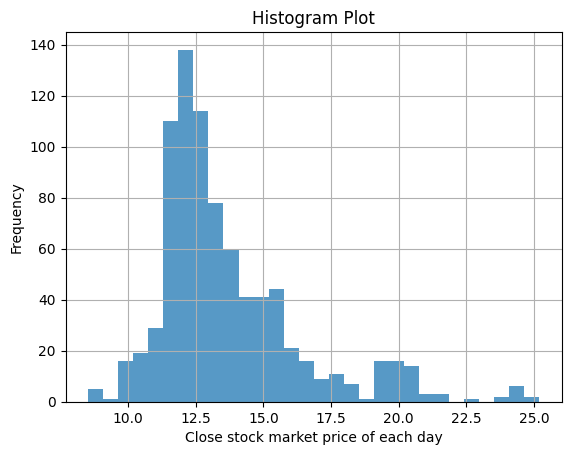

In [11]:
# The data doesn't have any nulls so there is no requirement for imputing the values now, let's check for the outliers.
# Histogram plot to review the distribution of the stock market data
plt.hist(ford_data['Close'], bins=30, alpha=0.75)
plt.title('Histogram Plot')
plt.xlabel('Close stock market price of each day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

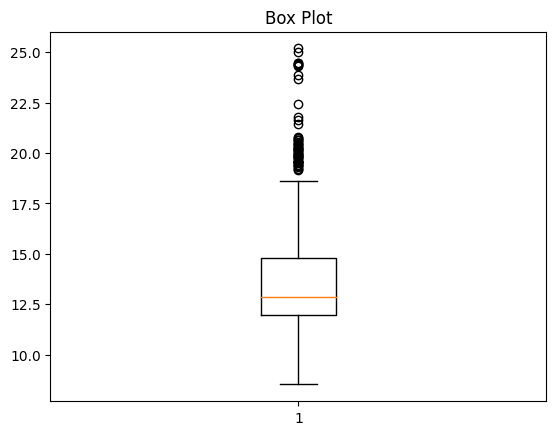

In [12]:
#Box plot to find the outliers in the close column of the ford_data
plt.boxplot(ford_data['Close'], vert = True)
plt.title('Box Plot')
plt.show()

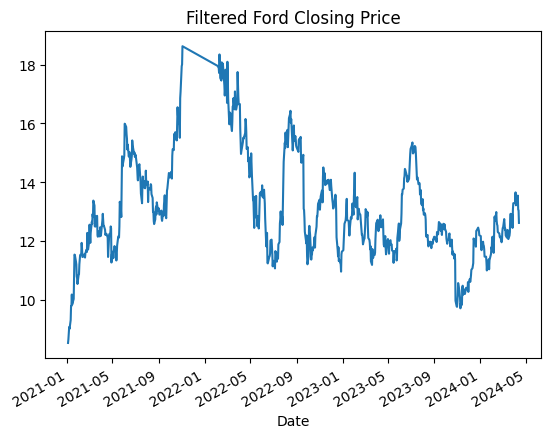

In [19]:
# Judging outliers in the data using the commonly used rule
# i.e., if the data point is an outlier if it is more than 1.5.IQR above the third quartile or below the first quartile.
q1 = ford_data['Close'].quantile(0.25)
q3 = ford_data['Close'].quantile(0.75)
iqr = q3 - q1
filter = (ford_data['Close'] >= q1 - 1.5 * iqr) & (ford_data['Close'] <= q3 + 1.5 * iqr)
filtered_data = ford_data.loc[filter]

# Plot filtered data
filtered_data['Close'].plot(title='Filtered Ford Closing Price')
plt.show()

The above plot shows the data after removing the outliers but, as stock market data can exhibit what might seem like outlier behavior due to its inherent volatility and responsiveness to market events like earnings announcements, changes in leadership, mergers and acquisitions, or broader economic news ...
So I am using the actual data without removing the outliers for my further analysis

**Calculating stock return : Return = (close-open)/open**

In [20]:
ford_data['Return'] = (ford_data['Close']  - ford_data['Open'])/ford_data['Open']

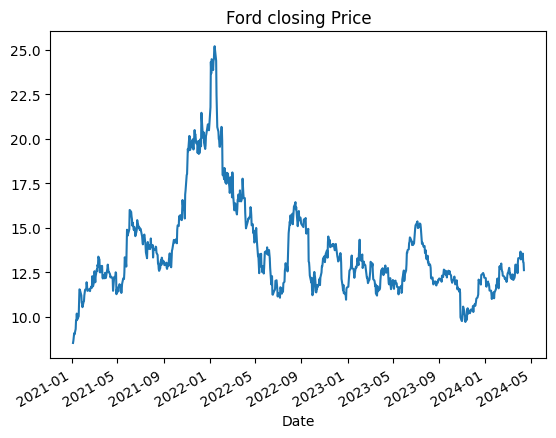

In [21]:
# Stock close price of the ford company starting from 2021 Jan 1st.
ford_data['Close'].plot(title='Ford closing Price')
plt.show()

From the above graph we can see that ford stock market price is almost maintaing at the same level except for a short period between 2021 end - 2022 start there is huge increse in the stock price of the ford which is quite interesting to divein to learn the reasons for stock price increase.

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

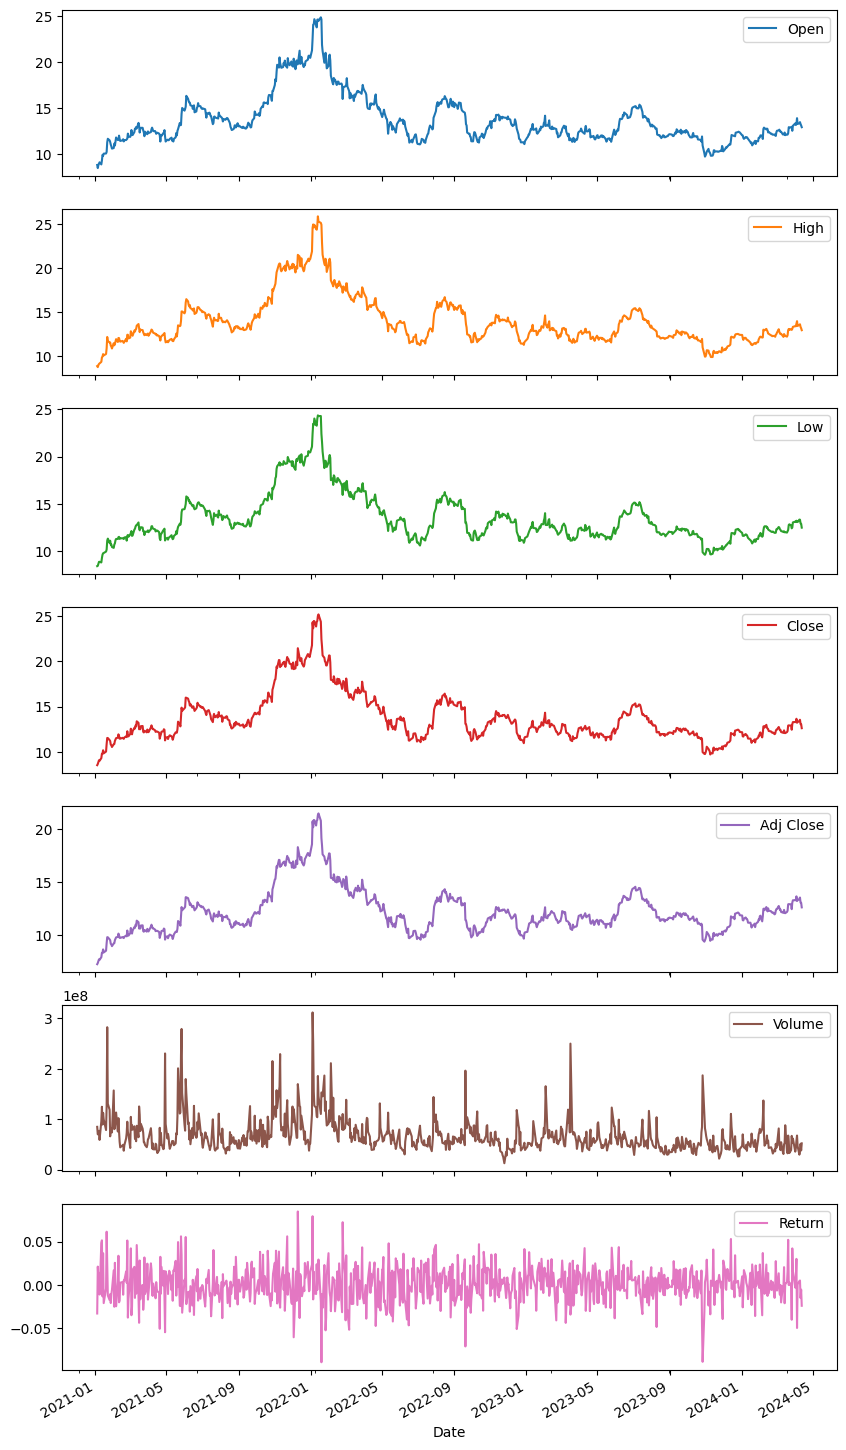

In [22]:
# Plotting all the metrics related to the strock data of ford
ford_data.plot(subplots = True, figsize = (10, 20))